In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Linear Regression using the normal Equation

In [6]:
"""Start by looking at the Linear Regression model, 
one of the simplest models there is. 
We will discuss two very different ways to train it: Using a direct “closed-form” equation that directly 
computes the model parameters that best fit the model to the training set (i.e., the model parameters 
that minimize the cost function over the training set). Using an iterative optimization approach, 
called Gradient Descent (GD), that gradually tweaks the model parameters to minimize the cost 
function over the training set, eventually converging to the same set of parameters as the first method. 
We will look at a few variants of Gradient Descent that we will use again and again when we study neural 
networks in Part II: Batch GD, Mini-batch GD, and Stochastic GD."""

'Start by looking at the Linear Regression model, \none of the simplest models there is. \nWe will discuss two very different ways to train it: Using a direct “closed-form” equation that directly \ncomputes the model parameters that best fit the model to the training set (i.e., the model parameters \nthat minimize the cost function over the training set). Using an iterative optimization approach, \ncalled Gradient Descent (GD), that gradually tweaks the model parameters to minimize the cost \nfunction over the training set, eventually converging to the same set of parameters as the first method. \nWe will look at a few variants of Gradient Descent that we will use again and again when we study neural \nnetworks in Part\xa0II: Batch GD, Mini-batch GD, and Stochastic GD.'

In [7]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

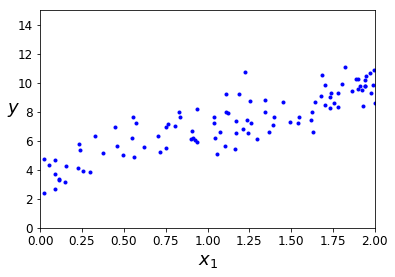

In [8]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()